#**PART 3**

**Importing Dataset**

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

In [3]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPMorgan Quantitative Analyst Forage /Task 3 and 4_Loan_Data.csv')

In [4]:
df = pd.DataFrame(loan_data)

In [5]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [6]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


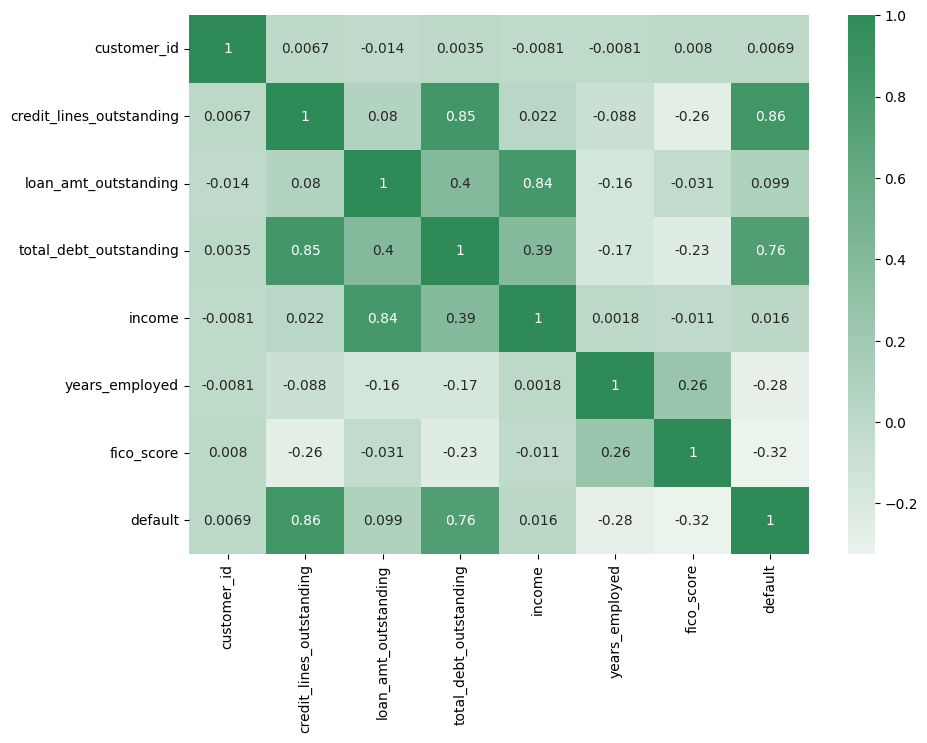

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap=sns.light_palette("seagreen", as_cmap=True)
)

plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [11]:
df.columns

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')

In [12]:
features = ['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

target = 'default'

In [13]:
X = df[features]
y = df[target]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)


Check missing values

In [15]:
cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]

print(cols_with_missing)

[]


In [16]:
default_prediction_model = RandomForestRegressor(random_state = 1)
default_prediction_model.fit(train_X, train_y)
train_score = default_prediction_model.score(train_X, train_y)
print(f'Training score is {train_score}')

Training score is 0.9966631682075842


In [28]:
val_predictions = default_prediction_model.predict(val_X)

print(pd.DataFrame(val_predictions))

         0
0     0.00
1     1.00
2     0.00
3     0.00
4     0.26
...    ...
2495  0.00
2496  1.00
2497  0.00
2498  1.00
2499  0.81

[2500 rows x 1 columns]


In [29]:
score = default_prediction_model.score(val_X, val_y)
print(f'Test score is {score}')

Test score is 0.9688273236969254


MODEL VALIDATION

In [30]:
from sklearn.metrics import mean_absolute_error

val_mae = mean_absolute_error(val_predictions, val_y)
print(val_mae)

0.00896


In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(val_y, val_predictions.round())
print(accuracy)

0.9948


In [32]:
fpr, tpr, thresholds = metrics.roc_curve(val_y, val_predictions)
print((1.0*(abs(val_y-val_predictions)).sum()) / len(df))
print(metrics.auc(fpr, tpr))

0.00224
0.9986901643248394


In [33]:
from typing import List

def customer_loan_default_prediction(customer_data: List[List[any]]):

    # Define column names based on the expected data structure
    columns = [
        'customer_id',
        'credit_lines_outstanding',
        'loan_amt_outstanding',
        'total_debt_outstanding',
        'income',
        'years_employed',
        'fico_score',
    ]

    # Create a DataFrame directly from the list of lists
    user_input = pd.DataFrame(customer_data, columns=columns)

    print(user_input)


    return default_prediction_model.predict(user_input)



In [34]:
customer_list = [
    [1, 3, 15000, 20000, 55000, 4, 720],
    [2, 5, 20000, 25000, 60000, 6, 680]
]

answer = customer_loan_default_prediction(customer_list)

print(answer)

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0            1                         3                 15000   
1            2                         5                 20000   

   total_debt_outstanding  income  years_employed  fico_score  
0                   20000   55000               4         720  
1                   25000   60000               6         680  
[0.41 0.82]


In [35]:
type(answer)

numpy.ndarray

**ANOTHER MODEL: LOGISTIC REGRESSION**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd


# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']

# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(clf.coef_, clf.intercept_)

# Use the following code to check yourself
y_pred = clf.predict(df[features])

fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default']-y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))


[[-1.09761451e-09  1.64643811e-06  8.24451665e-04  1.62230089e-03
  -3.83189594e-04 -5.84019113e-06 -3.17515921e-04]] [-1.63910299e-07]
0.0164
0.9709396154112104


**DECISION TREE CLASSIFIER**

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=3)
clf.fit(train_X, train_y)
train_score = clf.score(train_X, train_y)

val_score = clf.score(val_X, val_y)

print(f'train score: {train_score}')
print(f'test score: {val_score}')

train score: 0.998
test score: 0.9928


In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
scores

array([0.996, 0.994, 0.999, 0.997, 0.991, 0.997, 0.993, 0.996, 0.994,
       0.994])

**SUPPORT VECTOR CLASSIFIER**

In [45]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(train_X, train_y)


SVC(probability=True)

In [49]:
train_score = svc.score(train_X, train_y)
val_score = svc.score(val_X, val_y)

print(f'train score: {train_score}')
print(f'test score: {val_score}')

train score: 0.8190666666666667
test score: 0.8024


In [50]:
predictions = svc.predict(val_X)
mea = mean_absolute_error(predictions, val_y)
print(mea)

0.1976


In [51]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix( val_y, predictions).ravel()
print(f'Number of true negatives: {tn}')
print(f'Number of false positives: {fp}')
print(f'Number of false negatives: {fn}')
print(f'Number of true positives: {tp}')

Number of true negatives: 2006
Number of false positives: 0
Number of false negatives: 494
Number of true positives: 0


# **TASK 4**

In [52]:
# map FICO scores into certain ranges to convert it into categorical data
# FICO score is a value between 300 to 850
# construct a technique for predicting the PD (probability of default) for the borrowers using these scores
# create a rating map that maps the FICO score of the borrowers to a rating where a lower rating signifies a better credit score

In [53]:
min = 300
max = 850

bins = np.linspace(min,max, 5)


In [54]:
df['fico_category'] = pd.cut(df['fico_score'], bins=bins, labels=['ex_low', 'low', 'medium', 'high'], include_lowest=True)
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,payment_to_income,debt_to_income,fico_category
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.066909,0.050173,medium
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.073510,0.308789,low
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.051058,0.030787,medium
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.064105,0.033645,medium
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.057395,0.075435,medium
